# Single-Task Learning on Cifar10 Dataset (2 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 2-classes image classification on Cifar10.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 2           # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

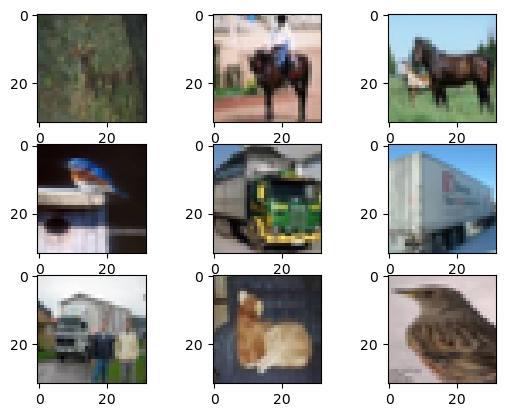

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Creating Superclasses
The super-classes are divided into animals and vehicles:
- **Animals**: Bird, Cat, Deer, Dog, Frog, Horse. (5000x6 training images, 1000x6 testing images).
- **Vehicles**: Airplane, Automotive, Ship, Truck. (5000x4 training images, 1000x4 testing images).

From [Cifar 10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html), we know that the labels have the corresponding label number:
- Airplane: 0.
- Automobile: 1.
- Bird: 2.
- Cat: 3.
- Deer: 4.
- Dog: 5.
- Frog: 6.
- Horse: 7.
- Ship: 8.
- Truck 9.

In [6]:
# define superclasses (0 = animal, 1 = vehicle)
animal_classes = [2, 3, 4, 5, 6, 7]
y_train = [0 if y in animal_classes else 1 for y in y_train ] 
y_test = [0 if y in animal_classes else 1 for y in y_test]

print(len(y_train))
print(len(y_test))

50000
10000


In [7]:
# check labels for accuracy (referencing image plotted above)
print(y_train[10:19])

[0, 0, 0, 0, 1, 1, 1, 0, 0]


## 1.3. Data Preprocessing

In [8]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
# reshape y_train and y_test match shape of X_train and X_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(50000, 2)
(10000, 2)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [10]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               3

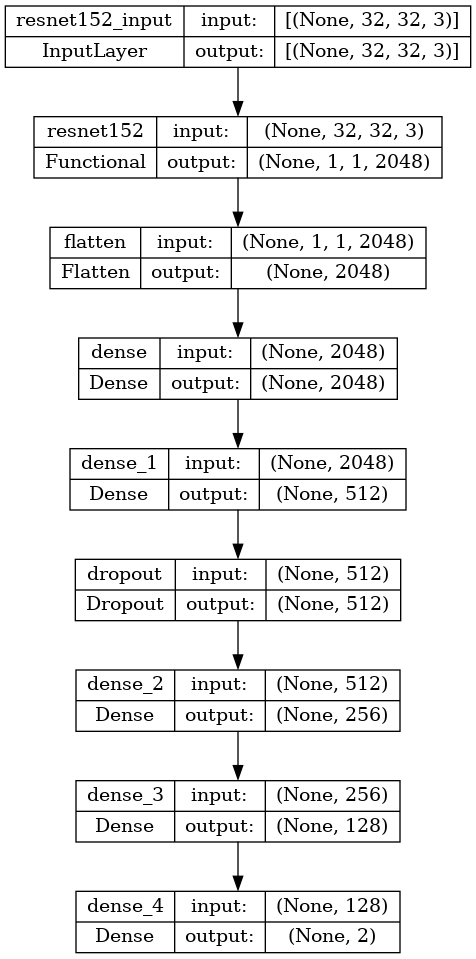

In [11]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 128, Dropout = 0, Optimizer = Adam)


In [13]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [14]:
# compile model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [15]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 161s 149ms/step - loss: 0.3784 - accuracy: 0.8358 - val_loss: 0.3042 - val_accuracy: 0.8763
Epoch 2/20
333/333 [==============================] - 46s 139ms/step - loss: 0.2441 - accuracy: 0.9023 - val_loss: 0.3622 - val_accuracy: 0.8971
Epoch 3/20
333/333 [==============================] - 46s 138ms/step - loss: 0.2094 - accuracy: 0.9180 - val_loss: 1.0473 - val_accuracy: 0.8948
Epoch 4/20
333/333 [==============================] - 46s 139ms/step - loss: 0.2207 - accuracy: 0.9153 - val_loss: 0.2686 - val_accuracy: 0.8973
Epoch 5/20
333/333 [==============================] - 46s 138ms/step - loss: 0.1826 - accuracy: 0.9286 - val_loss: 0.4280 - val_accuracy: 0.8740
Epoch 6/20
333/333 [==============================] - 46s 139ms/step - loss: 0.1615 - accuracy: 0.9374 - val_loss: 0.2093 - val_accuracy: 0.9172
Epoch 7/20
333/333 [==============================] - 46s 137ms/step - loss: 0.1973 - accuracy: 0.9222 - val_loss: 0.1840 - val_a

In [16]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.06826511025428772
Train Acc: 0.9731529355049133

Test Loss: 0.31080466508865356
Test Acc: 0.9280999898910522


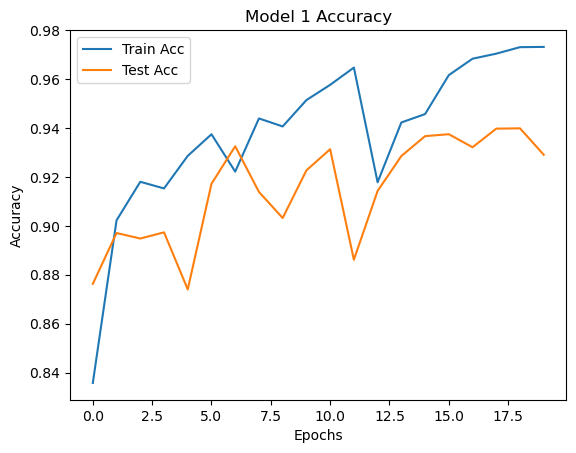

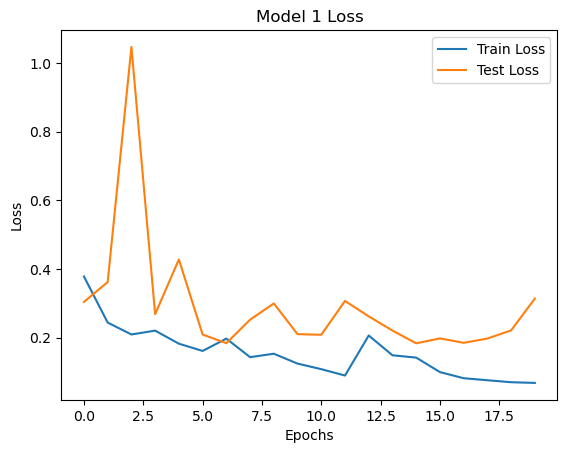

In [17]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 64, Dropout = 0, Optimizer = Adam)

In [18]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [19]:
# compile model
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 188s 130ms/step - loss: 0.3690 - accuracy: 0.8428 - val_loss: 0.3375 - val_accuracy: 0.8712
Epoch 2/20
665/665 [==============================] - 83s 125ms/step - loss: 0.2707 - accuracy: 0.8905 - val_loss: 0.2671 - val_accuracy: 0.9075
Epoch 3/20
665/665 [==============================] - 84s 126ms/step - loss: 0.2639 - accuracy: 0.8944 - val_loss: 0.2334 - val_accuracy: 0.9095
Epoch 4/20
665/665 [==============================] - 84s 126ms/step - loss: 0.2193 - accuracy: 0.9135 - val_loss: 0.2062 - val_accuracy: 0.9213
Epoch 5/20
665/665 [==============================] - 86s 129ms/step - loss: 0.1894 - accuracy: 0.9251 - val_loss: 0.1938 - val_accuracy: 0.9251
Epoch 6/20
665/665 [==============================] - 85s 129ms/step - loss: 0.1732 - accuracy: 0.9325 - val_loss: 0.2167 - val_accuracy: 0.9231
Epoch 7/20
665/665 [==============================] - 85s 127ms/step - loss: 0.1626 - accuracy: 0.9360 - val_loss: 0.4197 - val_a

In [21]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.11615872383117676
Train Acc: 0.9554823637008667

Test Loss: 0.1770673394203186
Test Acc: 0.9316999912261963


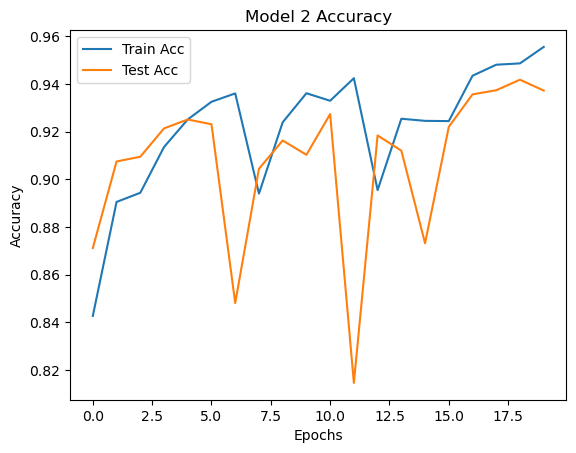

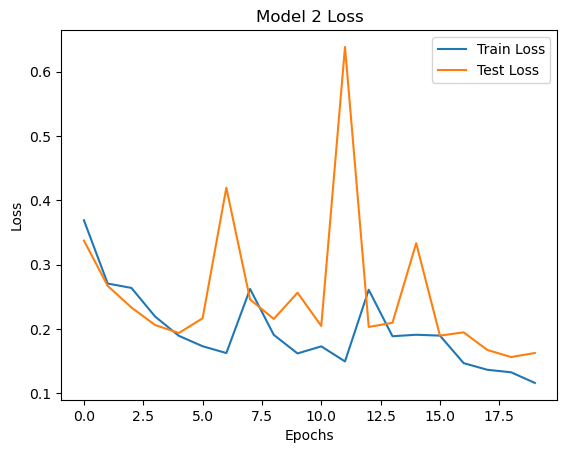

In [22]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 64, Dropout = 0.4, Optimizer = Adam)

In [23]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'Adam'

model_3 = create_model(dropout)

In [24]:
# compile model
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [25]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 189s 132ms/step - loss: 0.3950 - accuracy: 0.8327 - val_loss: 0.3173 - val_accuracy: 0.8956
Epoch 2/20
665/665 [==============================] - 84s 127ms/step - loss: 0.2693 - accuracy: 0.8935 - val_loss: 0.2590 - val_accuracy: 0.8995
Epoch 3/20
665/665 [==============================] - 85s 128ms/step - loss: 0.2213 - accuracy: 0.9141 - val_loss: 0.2998 - val_accuracy: 0.9083
Epoch 4/20
665/665 [==============================] - 86s 129ms/step - loss: 0.2027 - accuracy: 0.9221 - val_loss: 1.1526 - val_accuracy: 0.7941
Epoch 5/20
665/665 [==============================] - 85s 128ms/step - loss: 0.2747 - accuracy: 0.8908 - val_loss: 0.2322 - val_accuracy: 0.9111
Epoch 6/20
665/665 [==============================] - 84s 127ms/step - loss: 0.1955 - accuracy: 0.9222 - val_loss: 0.1920 - val_accuracy: 0.9269
Epoch 7/20
665/665 [==============================] - 85s 127ms/step - loss: 0.1805 - accuracy: 0.9305 - val_loss: 0.2100 - val_a

In [26]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.15674729645252228
Train Acc: 0.942023515701294

Test Loss: 0.1620301455259323
Test Acc: 0.9417999982833862


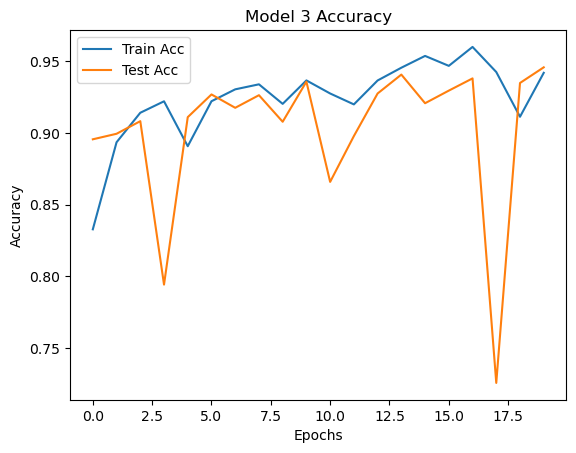

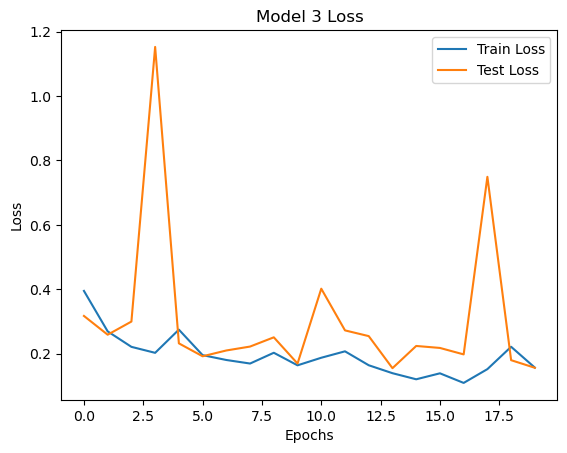

In [27]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [28]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [29]:
# compile model
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 91s 139ms/step - loss: 0.5199 - accuracy: 0.7368 - val_loss: 51164823552.0000 - val_accuracy: 0.4021
Epoch 2/20
333/333 [==============================] - 44s 132ms/step - loss: 0.4276 - accuracy: 0.8071 - val_loss: 0.5936 - val_accuracy: 0.7347
Epoch 3/20
333/333 [==============================] - 43s 129ms/step - loss: 0.3380 - accuracy: 0.8579 - val_loss: 0.9837 - val_accuracy: 0.4745
Epoch 4/20
333/333 [==============================] - 44s 133ms/step - loss: 0.3332 - accuracy: 0.8602 - val_loss: 0.6404 - val_accuracy: 0.5624
Epoch 5/20
333/333 [==============================] - 44s 132ms/step - loss: 0.2887 - accuracy: 0.8826 - val_loss: 44278948.0000 - val_accuracy: 0.5979
Epoch 6/20
333/333 [==============================] - 43s 130ms/step - loss: 0.4818 - accuracy: 0.7670 - val_loss: 1.0633 - val_accuracy: 0.5795
Epoch 7/20
333/333 [==============================] - 44s 132ms/step - loss: 0.3855 - accuracy: 0.8322 - val_loss

In [31]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.2295888364315033
Train Acc: 0.9076941013336182

Test Loss: 0.2679115831851959
Test Acc: 0.8914999961853027


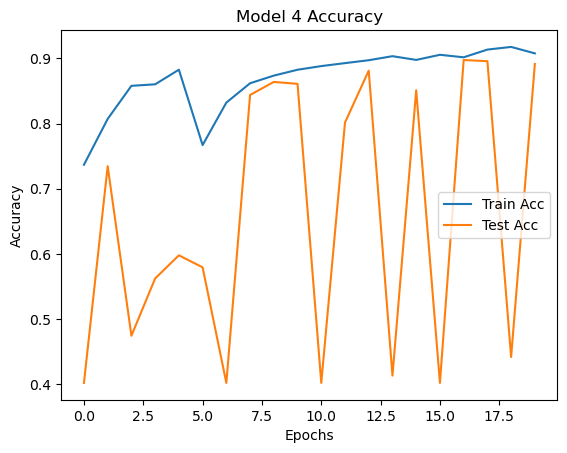

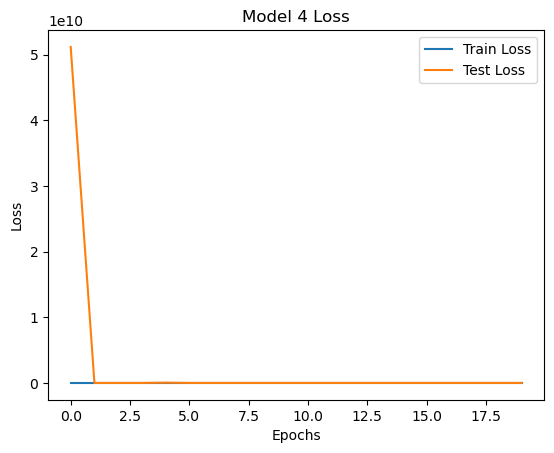

In [32]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 64, Dropout = 0, Optimizer = SGD)

In [33]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [34]:
# compile model
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 127s 123ms/step - loss: 0.4660 - accuracy: 0.7782 - val_loss: 0.5328 - val_accuracy: 0.7811
Epoch 2/20
665/665 [==============================] - 78s 117ms/step - loss: 0.3302 - accuracy: 0.8596 - val_loss: 0.2893 - val_accuracy: 0.8804
Epoch 3/20
665/665 [==============================] - 78s 118ms/step - loss: 0.2802 - accuracy: 0.8843 - val_loss: 0.6100 - val_accuracy: 0.7761
Epoch 4/20
665/665 [==============================] - 78s 117ms/step - loss: 0.2744 - accuracy: 0.8860 - val_loss: 0.5191 - val_accuracy: 0.7415
Epoch 5/20
665/665 [==============================] - 76s 114ms/step - loss: 0.2583 - accuracy: 0.8931 - val_loss: 0.3116 - val_accuracy: 0.8873
Epoch 6/20
665/665 [==============================] - 79s 118ms/step - loss: 0.2344 - accuracy: 0.9047 - val_loss: 0.3619 - val_accuracy: 0.8803
Epoch 7/20
665/665 [==============================] - 77s 115ms/step - loss: 0.2048 - accuracy: 0.9188 - val_loss: 1.1541 - val_a

In [36]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.2308945506811142
Train Acc: 0.9046587944030762

Test Loss: 0.24260224401950836
Test Acc: 0.9070000052452087


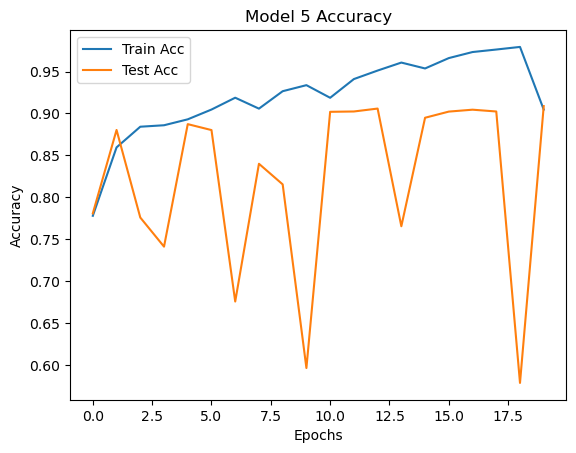

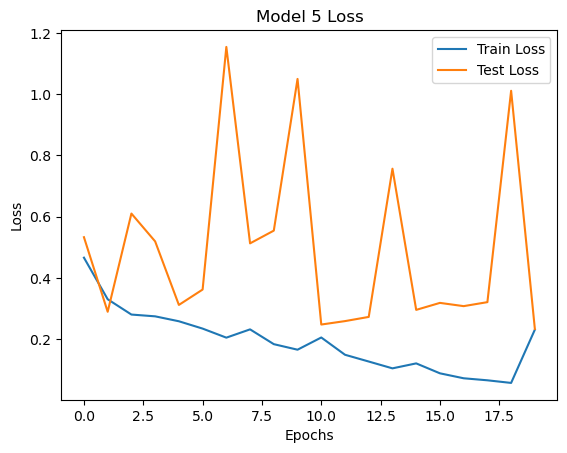

In [37]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 64, Dropout = 0.4, Optimizer = SGD)

In [38]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'SGD'

model_6 = create_model(dropout)

In [39]:
# compile model
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 129s 127ms/step - loss: 0.4916 - accuracy: 0.7591 - val_loss: 12.7727 - val_accuracy: 0.4073
Epoch 2/20
665/665 [==============================] - 77s 116ms/step - loss: 0.3738 - accuracy: 0.8388 - val_loss: 0.3695 - val_accuracy: 0.8379
Epoch 3/20
665/665 [==============================] - 79s 119ms/step - loss: 0.3046 - accuracy: 0.8736 - val_loss: 0.7524 - val_accuracy: 0.7433
Epoch 4/20
665/665 [==============================] - 81s 121ms/step - loss: 0.2861 - accuracy: 0.8812 - val_loss: 0.6771 - val_accuracy: 0.6073
Epoch 5/20
665/665 [==============================] - 78s 117ms/step - loss: 0.2679 - accuracy: 0.8895 - val_loss: 3.1633 - val_accuracy: 0.6007
Epoch 6/20
665/665 [==============================] - 77s 116ms/step - loss: 0.2548 - accuracy: 0.8960 - val_loss: 0.2847 - val_accuracy: 0.8855
Epoch 7/20
665/665 [==============================] - 78s 117ms/step - loss: 0.2189 - accuracy: 0.9111 - val_loss: 0.2723 - val_

In [41]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.09465141594409943
Train Acc: 0.9641647338867188

Test Loss: 0.8369261026382446
Test Acc: 0.6850000023841858


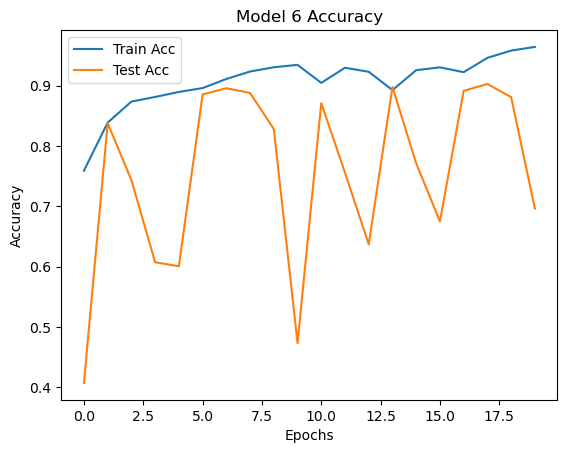

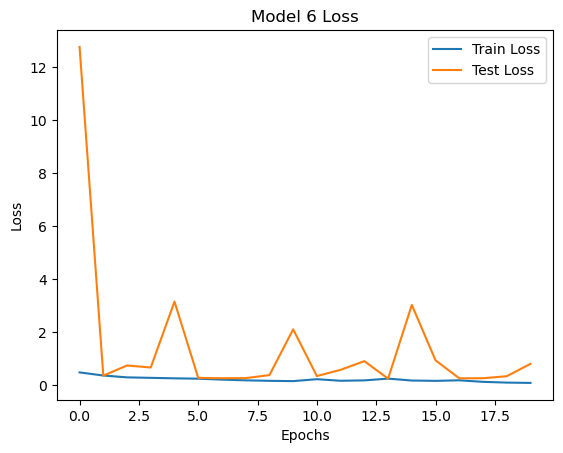

In [42]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()